<a href="https://colab.research.google.com/github/dsadasafd/GAN/blob/main/mnist_first_attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('./mount')

Mounted at ./mount


In [2]:
import torch
import torch.nn as nn
import numpy, pandas, random
import matplotlib.pyplot as plt
from torch.utils.data import Dataset


In [3]:
class MnistDataset(Dataset):
  
  # 超调用继承
  def __init__(self, csv_file):
    
    self.data_df = pandas.read_csv(csv_file, header=None)
    pass

  def __len__(self):
    return len(self.data_df)

  def __getitem__(self, index):
    
    # dataset body content
    label = self.data_df.iloc[index, 0]
    target = torch.zeros((10))
    target[label] = 1.0

    image_data = torch.FloatTensor(self.data_df.iloc[index, 1:].values)/255.0

    return label, image_data, target

  def plot_image(self, index):
    
    image_arr = self.data_df.iloc[index, 1:].values.reshape(28,28)
    plt.imshow(image_arr, interpolation='none', cmap='Blues')
    plt.title('label = ' + str(self.data_df.iloc[index, 0]))

    pass






In [4]:
## load data

mnist_dataset = MnistDataset('mount/My Drive/Colab Notebooks/mnist_data/mnist_train.csv')

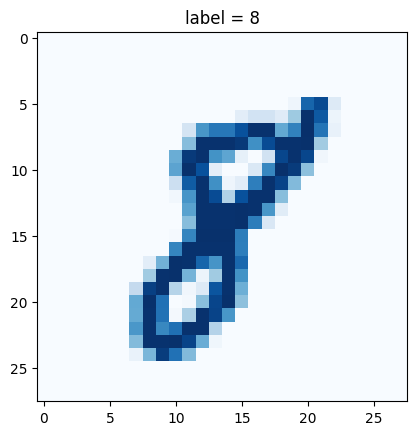

In [5]:
## check the data

mnist_dataset.plot_image(17)

In [6]:
from torch.nn.modules.activation import Sigmoid
# 创建一个判别器

class Discriminator(nn.Module):

  def __init__(self):
    
    # 初始化继承父类 
    super().__init__()
    
    # 构建网络body
    self.model = nn.Sequential(
        nn.Linear(784, 200),
        nn.Sigmoid(),
        nn.Linear(200, 1),
        nn.Sigmoid()
    )

    # 损失函数使用MSELoss
    self.loss_function = nn.MSELoss()

    # 优化器使用
    self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

    # 计数器和loss记录
    self.counter = 0
    self.progress = []

    pass



  def forward(self, inputs):
    return self.model(inputs)



  def train(self, inputs, targets):

    outputs = self.forward(inputs)
    loss = self.loss_function(outputs, targets)

    # 记录训练过程
    self.counter += 1
    
    if (self.counter % 10 == 0):
      self.progress.append(loss.item())
      pass

    if (self.counter % 10000 == 0):
      print('counter = ', self.counter)
      pass

    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()

    pass

  def plot_progress(self):

    df = pandas.DataFrame(self.progress, columns=['loss'])
    df.plot(ylim=(0.0, 1.0), figsize=(16, 8), alpha=0.1, marker='.', grid=True, yticks=(0.0, 0.25, 0.5))
    pass


In [7]:
def generate_random(size):

  random_data = torch.rand(size)

  return random_data

In [8]:
%%time

D = Discriminator()

for label, image_data_tensor, target_tensor in mnist_dataset:

  # 训练真实数据
  D.train(image_data_tensor, torch.FloatTensor([1.0]))

  # 训练生成数据
  D.train(generate_random(784), torch.FloatTensor([0.0]))

  pass

counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
CPU times: user 1min 4s, sys: 101 ms, total: 1min 4s
Wall time: 1min 6s


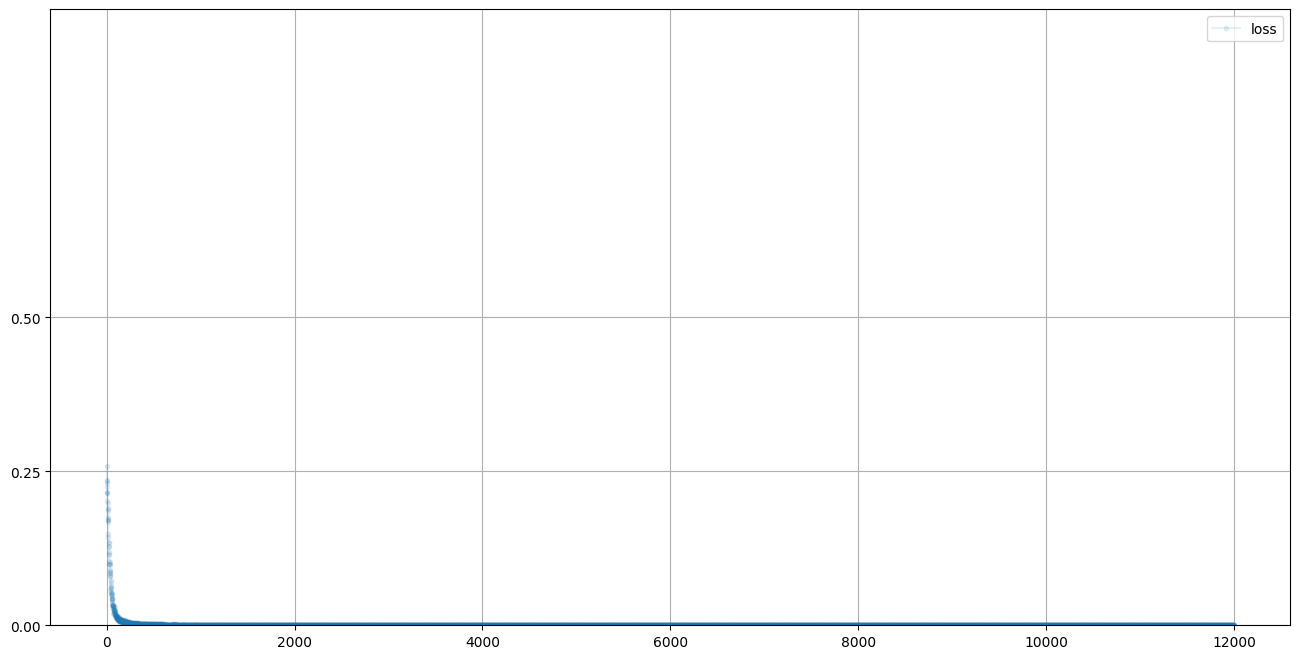

In [9]:
D.plot_progress()

In [11]:
# 测试一下鉴别器
for i in range(4):
  image_data_tensor = mnist_dataset[random.randint(0, 60000)][1]
  print(D.forward(image_data_tensor))

for i in range(4):
  print(D.forward(generate_random(784)))

tensor([0.9972], grad_fn=<SigmoidBackward0>)
tensor([0.9960], grad_fn=<SigmoidBackward0>)
tensor([0.9918], grad_fn=<SigmoidBackward0>)
tensor([0.9956], grad_fn=<SigmoidBackward0>)
tensor([0.0050], grad_fn=<SigmoidBackward0>)
tensor([0.0051], grad_fn=<SigmoidBackward0>)
tensor([0.0047], grad_fn=<SigmoidBackward0>)
tensor([0.0054], grad_fn=<SigmoidBackward0>)


In [ ]:
# 创建生成器

class generator()